In [ ]:
"""
File Name: partition.ipynb

Description: analysis of paritions.

Author: junghwan lee
Email: jhrrlee@gmail.com
Date Created: 2023.09.07

"""

In [8]:
!pip install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 8.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82807 sha256=775ff979da724df8a2f9a3b674b97d521c39fbb05865be6e8c87688e65802635
  Stored in directory: /root/.cache/pip/wheels/a0/e8/c6/a37ea663620bd5200ea1ba0907ab3c217042c1d035ef606acc
  Created wheel for pynndescent: filename=pynndescent-0.5.10-py3-none-any.whl size=55615 sha256=c8e68541ce5b14285b709cab02234bdb80e7fee4d25d1ac82f6aa7cd7725471f
  Stored in directory: /root/.cache/pip/wheels/4a/38/5d/f60a40a66a9512b7e5e83517ebc2d1b42d857be97d135f1096
Successfully built umap-learn pynndescent


In [ ]:
import numpy as np
from scipy.stats import shapiro
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from matplotlib.lines import Line2D
from sklearn.metrics import silhouette_score
from pandas.plotting import parallel_coordinates
from sklearn.manifold import TSNE
import pandas as pd
from sklearn.model_selection import train_test_split
from importlib import reload
import partition_lib

In [ ]:
reload(partition_lib)

In [10]:
from partition_lib import BatteryDataAnalyzer

In [1]:
from pathlib import Path

gen_path = Path('..') / 'resource' / 'dataset'

eol_path = gen_path / 'eol.npy'
new_cycle_sum_path = gen_path / 'new_cycle_sum.npy'
train_indice_path = gen_path / 'train_indices.npy'
val_indice_path = gen_path / 'val_indices.npy'
test_indice_path = gen_path / 'test_indices.npy'

In [4]:
new_cycle_sum = np.load(new_cycle_sum_path, allow_pickle=True)
eol = np.load(eol_path, allow_pickle=True)
features = ["IR", "QC", "QD", "Tavg", "Tmin", "Tmax", "chargetime", "dqdvavg", "dqdvmax", "dqdvmin", "IDavg", "IDmax", "ICavg", "ICmax"]


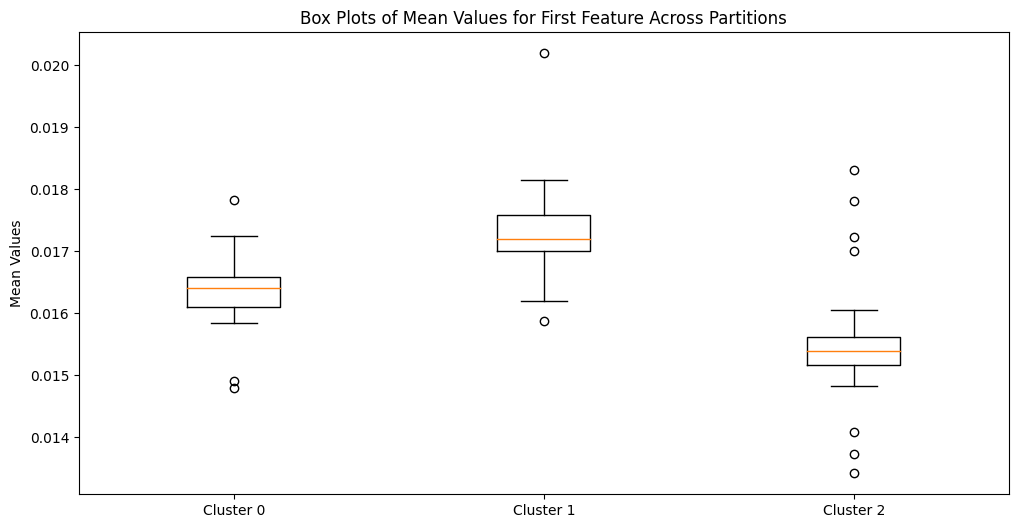

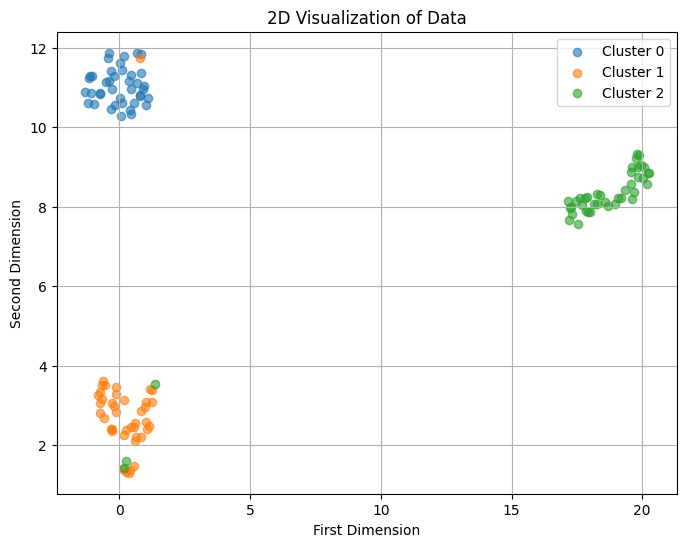

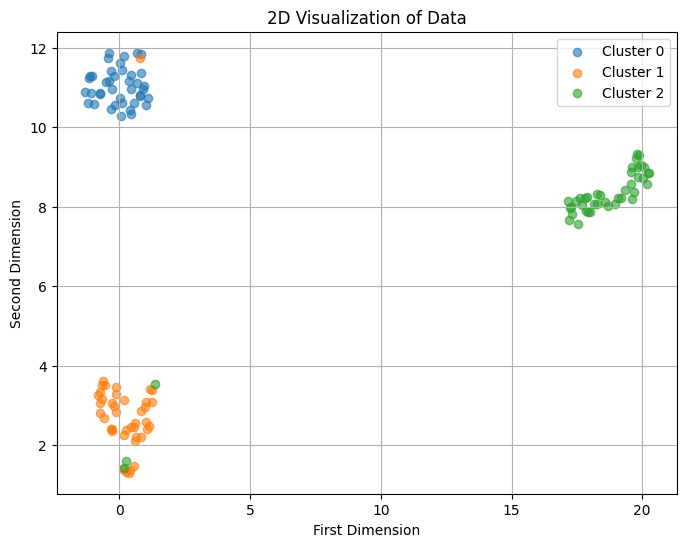

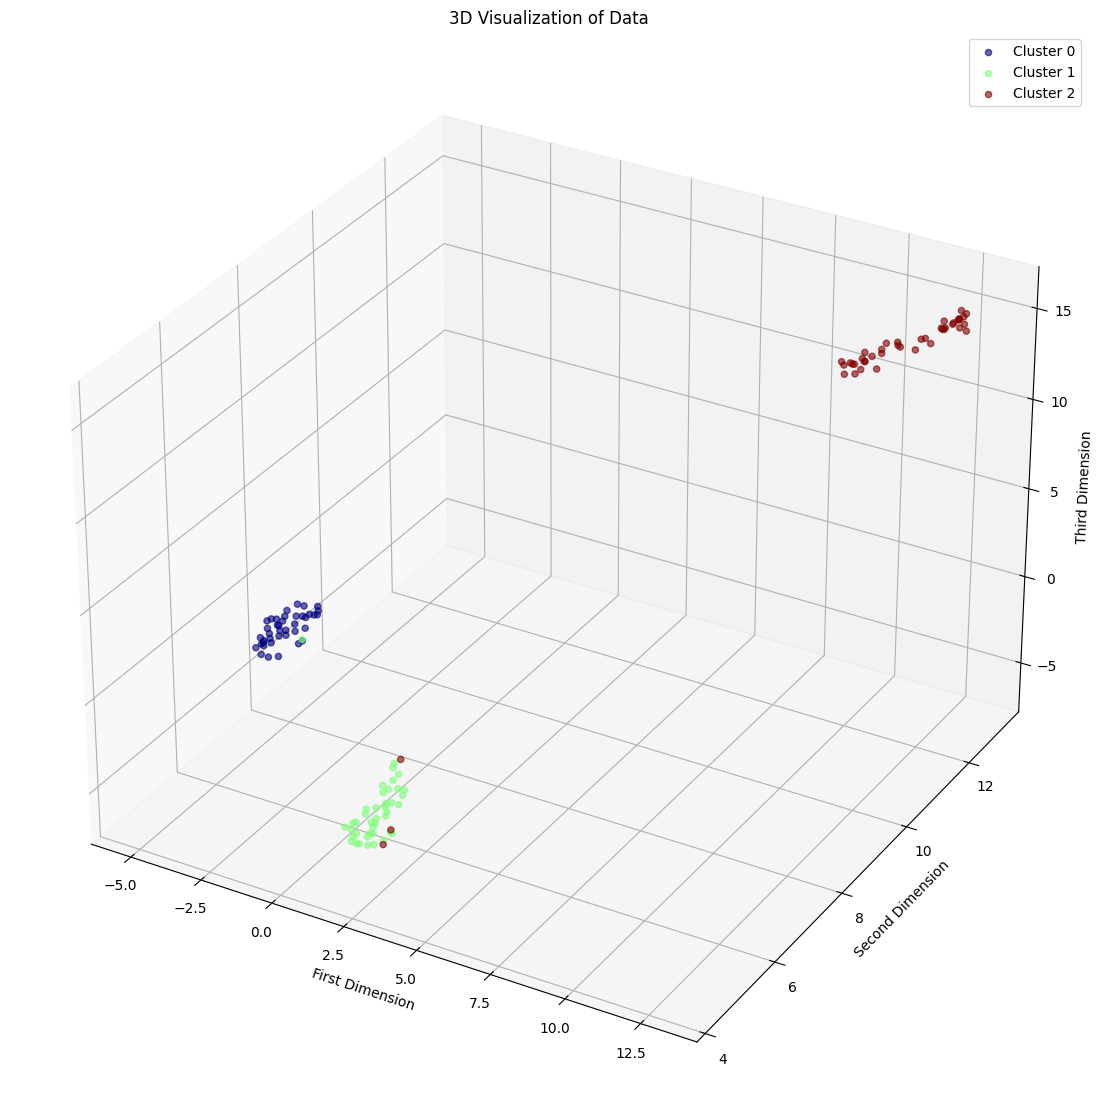

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

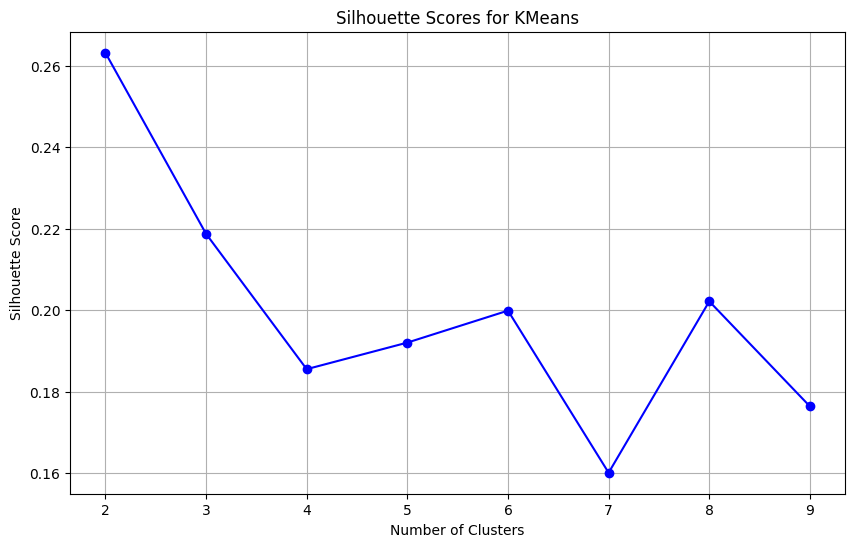

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


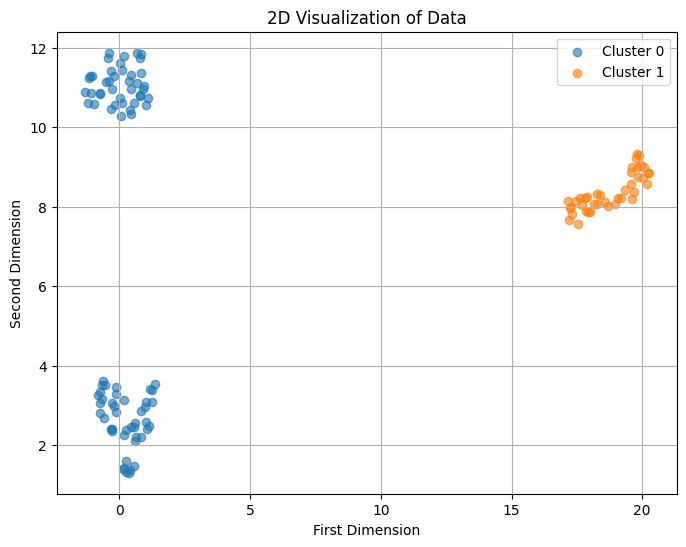

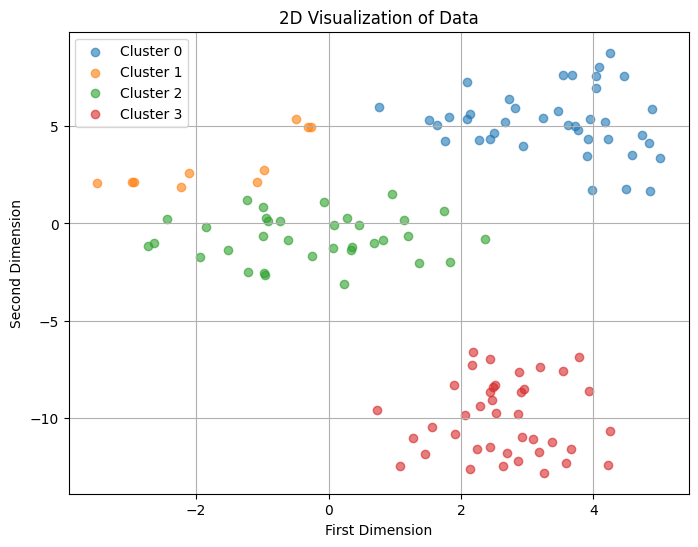

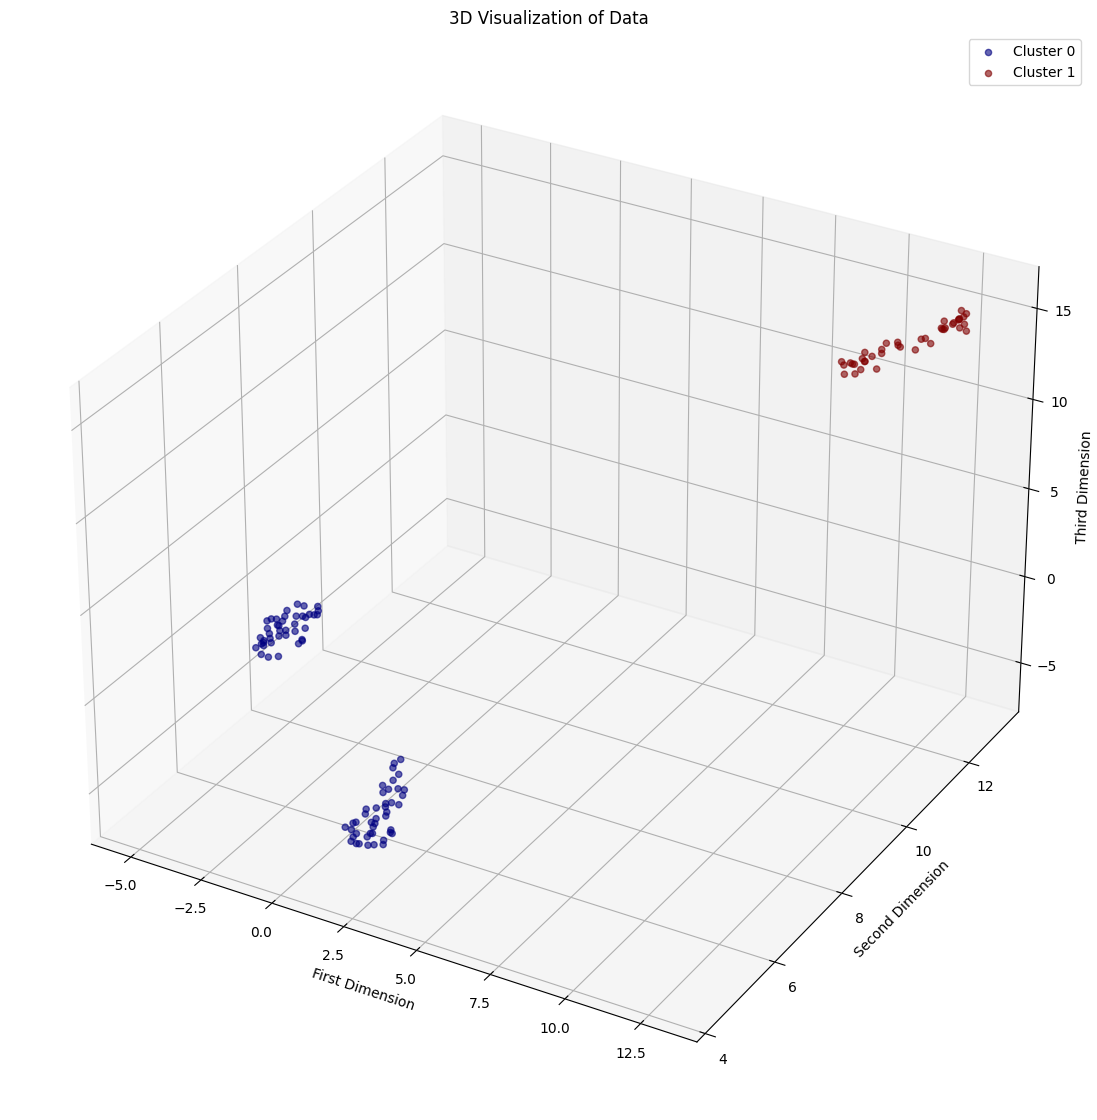

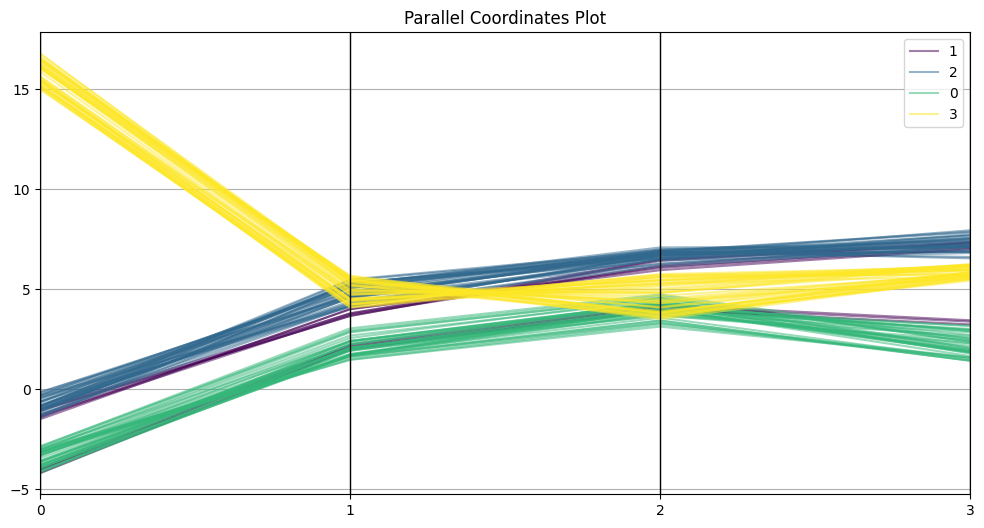

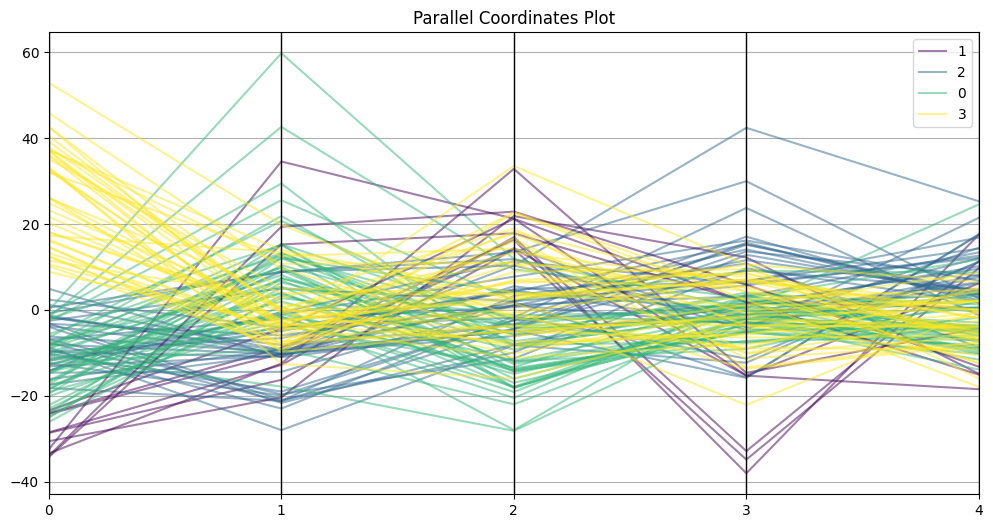

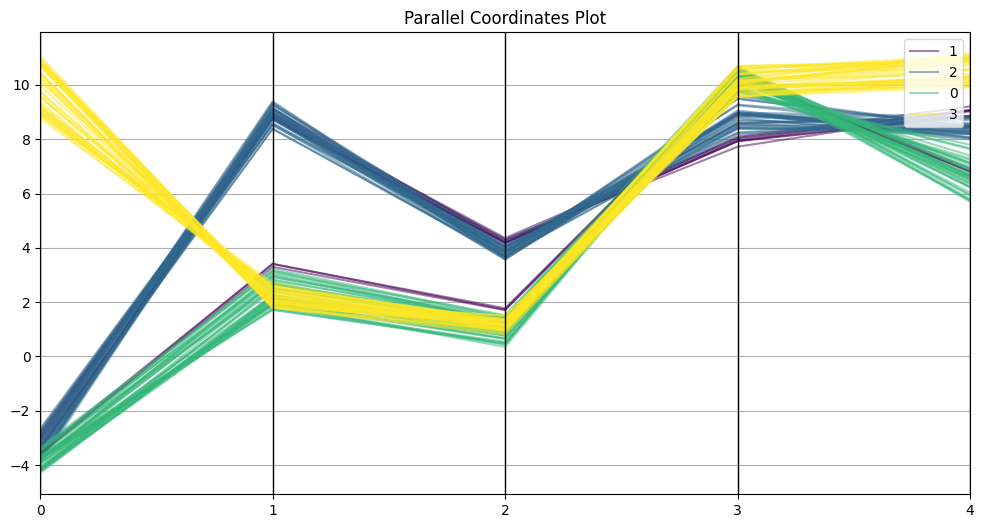

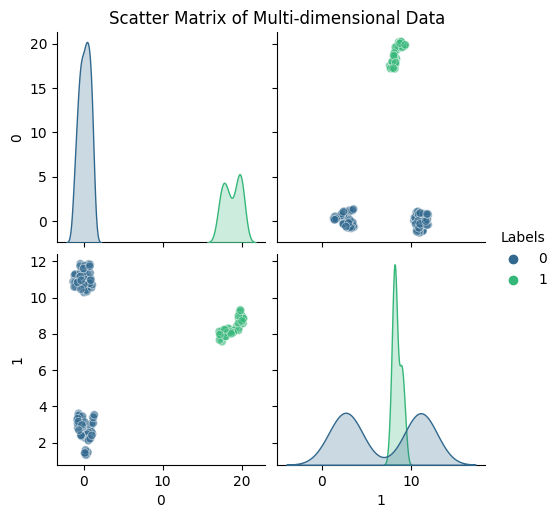

In [12]:
# Initialize the analyzer
analyzer = BatteryDataAnalyzer(new_cycle_sum)

# Preprocess the data
label_embeddings = analyzer.preprocess([40, 41, 43])

# Visualize the cluster statistics
analyzer.visualize(new_cycle_sum, label_embeddings, visualization_type="cluster_statistics")

# Reduce the dimensionality
reduced_data_2d = analyzer.reduce_dimension(method='UMAP', n_components=2)
analyzer.visualize(reduced_data_2d, label_embeddings, visualization_type="2d")

reduced_data_2d_tsne = analyzer.reduce_dimension(method='t-SNE', n_components=2)
analyzer.visualize(reduced_data_2d, label_embeddings, visualization_type="2d")

reduced_data_3d = analyzer.reduce_dimension(method='UMAP', n_components=3)
analyzer.visualize(reduced_data_3d, label_embeddings, visualization_type="3d")

reduced_data_4d = analyzer.reduce_dimension(method='UMAP', n_components=4)
reduced_data_5d = analyzer.reduce_dimension(method='UMAP', n_components=5)
reduced_data_5d_pca = analyzer.reduce_dimension(method='PCA', n_components=5)


# Determine optimal clusters and cluster the data
optimal_clusters = analyzer.determine_optimal_clusters(method='KMeans', max_clusters=10)
optimal_labels = analyzer.cluster(method='KMeans', n_clusters=optimal_clusters)
labels_3g = analyzer.cluster(method='KMeans', n_clusters=3)
labels_4g = analyzer.cluster(method='KMeans', n_clusters=4)

# Visualize the results using different visualization methods
analyzer.visualize(reduced_data_2d, optimal_labels, visualization_type="2d")
analyzer.visualize(reduced_data_2d_tsne, labels_4g, visualization_type="2d")
analyzer.visualize(reduced_data_3d, optimal_labels, visualization_type="3d")
analyzer.visualize(reduced_data_4d, labels_4g, visualization_type="parallel_coordinates")
analyzer.visualize(reduced_data_5d_pca, labels_4g, visualization_type="parallel_coordinates")
analyzer.visualize(reduced_data_5d, labels_4g, visualization_type="parallel_coordinates")
analyzer.visualize(reduced_data_2d, optimal_labels, visualization_type="scatter_matrix")


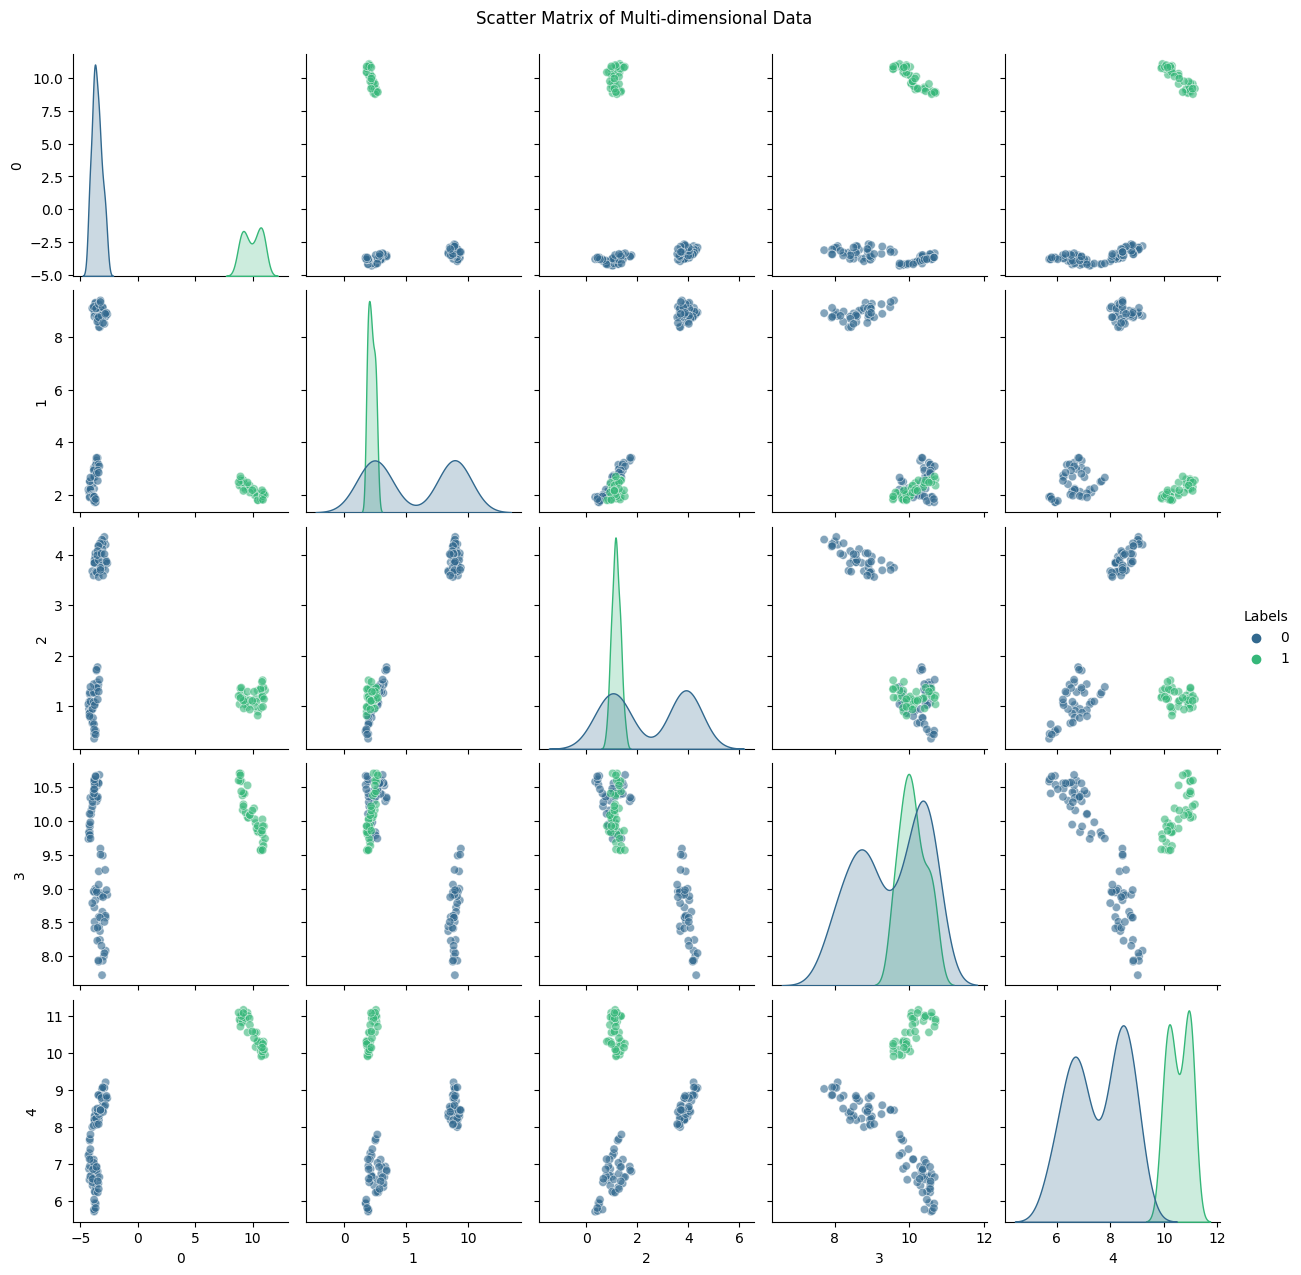

In [13]:
analyzer.visualize(reduced_data_5d, optimal_labels, visualization_type="scatter_matrix")

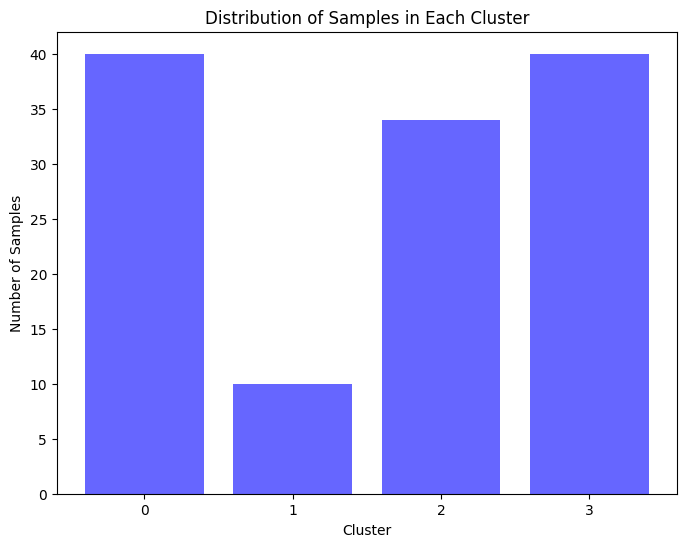

In [14]:
dis_samples = analyzer.plot_cluster_distribution(labels_4g)

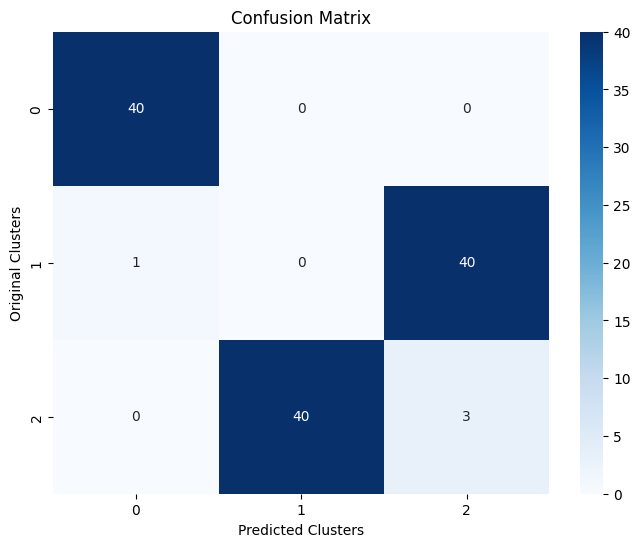

In [15]:
analyzer.plot_confusion_matrix(label_embeddings, labels_3g)

In [16]:
train_data, val_data, test_data, train_indices, val_indices, test_indices = analyzer.stratified_data_split_fixed_size(new_cycle_sum, labels_4g, 40, 41)

In [17]:
print(train_indices, len(train_indices))
print(val_indices, len(val_indices))
print(test_indices, len(test_indices))

[3, 5, 11, 14, 15, 18, 19, 22, 24, 29, 33, 35, 39, 41, 44, 45, 47, 50, 62, 64, 65, 69, 71, 72, 77, 78, 83, 84, 91, 96, 98, 104, 107, 109, 110, 112, 113, 117, 118, 120] 40
[0, 1, 2, 7, 8, 10, 17, 27, 30, 31, 32, 36, 38, 40, 48, 49, 53, 55, 56, 59, 60, 67, 70, 75, 79, 80, 81, 82, 85, 87, 90, 92, 93, 94, 95, 97, 101, 102, 111, 115, 116] 41
[4, 6, 9, 12, 13, 16, 20, 21, 23, 25, 26, 28, 34, 37, 42, 43, 46, 51, 52, 54, 57, 58, 61, 63, 66, 68, 73, 74, 76, 86, 88, 89, 99, 100, 103, 105, 106, 108, 114, 119, 121, 122, 123] 43


In [18]:
np.save(train_indice_path,train_indices)
np.save(val_indice_path,val_indices)
np.save(test_indice_path,test_indices)

We applied various clustering techniques to group 124 batteries based on 14 features over 100 cycles. These features include "IR", "QC", "QD", "Tavg", "Tmin", "Tmax", "chargetime", "dqdvavg", "dqdvmax", "dqdvmin", "IDavg", "IDmax", "ICavg", and "ICmax".

We used the K-means clustering algorithm, which optimally partitioned the batteries into two distinct groups.However, to explore the data in greater depth and potentially uncover more nuanced similarities and differences, we decided to divide the batteries into four clusters.

To visualize the high-dimensional battery data, we employed Principal Component Analysis (PCA), t-Distributed Stochastic Neighbor Embedding (t-SNE), and Uniform Manifold Approximation and Projection (UMAP) to reduce the dimensionality. Visualizations showed clear groupings of the batteries corresponding to the  clusters identified by K-means, reinforcing the validity of the clustering results.

We used a stratified sampling approach to partition the batteries into training, validation, and test sets. Stratified sampling is a method of sampling that involves dividing a population into homogeneous subgroups known as strata. In the context of this study, the strata were defined by the clusters identified through our clustering analysis of the batteries.

Stratified sampling was chosen over simple random sampling to ensure that each set (training, validation, and test) was representative of the overall distribution of the batteries. This is important because it helps to ensure that the performance of the models we train and validate is reflective of their expected performance on new, unseen data.

Our stratified sampling approach resulted in a training set of 40 batteries, a validation set of 41 batteries, and a test set of 43 batteries. Each set contains a mix of batteries from all identified clusters, providing a balanced and comprehensive representation of the data for model training, tuning, and evaluation.

This partitioning method is beneficial in maintaining the distribution of the data in each set. It ensures that all variations of the data are present in the training set for the model to learn, in the validation set for tuning the model, and in the test set for getting an unbiased evaluation of the final model.


In conclusion, our cluster analysis of the battery data revealed significant differences among the batteries that were not apparent from a cursory examination of the features. These findings may have important implications for predicting the end-of-life (EOL) and the reaming useful lifetime (RUL) of lithium-ion batteries and managing their usage. Future work could delve deeper into the specific characteristics that differentiate the clusters and their impact on prediction performance.